# 1. Problem statement

The objective of this project is to predict whether a loan-applicant is eligible for the loan given their finanical details. We'll explore using Machine Learning algorithms to make these predictions and solve the problem.

# 2. Deciding Performance metric

To measure the performance of various ML algorithms & experiments, we need a metric. Also, the task at hand is a `classification` task.
Some of the common classification task metrics are: `Accuracy, Precision, Recall, F1-score`.

$$\text{Accuracy} = \frac{TP}{TP+TN+FP+FN}$$
$$\text{Precision} = \frac{TP}{TP+FP}$$
$$\text{Recall} = \frac{TP}{TP+FN}$$
$$\text{F1-score} = \frac{\text{2 * Precision * Recall}}{\text{Precision + Recall}}$$

To choose the correct metric among the above, we'll need to look at the distribution of the target feature i.e. ***loan_status*** in the dataset.

## Load dataset

In [ ]:
## Import libraries
import pandas as pd
import seaborn as sns

In [3]:
DATA_PATH = "../data/Loantap.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
# Columns in dataset
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<Axes: xlabel='loan_status', ylabel='percent'>

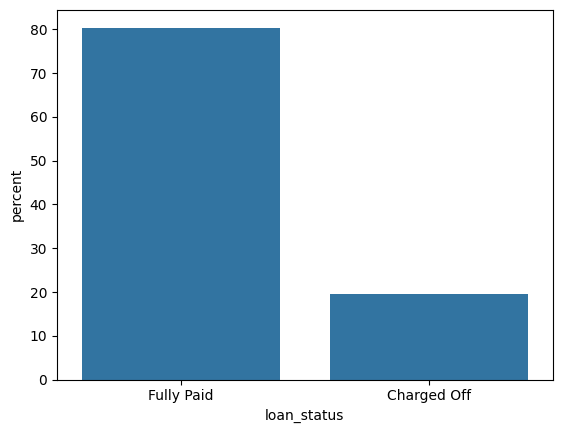

In [14]:
# Visualizing target variable
sns.countplot(x=df["loan_status"], stat="percent")

Looking the distribution of `loan_status`, it obviously is an imbalanced dataset i.e. number of instances of both the classes __Fully Paid__ & __Charged Off__ is skewed (80:20). We'll consider minority class (__Charged Off__) as the positive class. 
For an imbalanced dataset, Accuracy as a metric choice can be ruled out, because the model can easily achieve higher accuracy by just predicting the majority class without learning any underlying patterns.

To decide between Precision & Recall, we need to decide which needs more focus: False Positives (rejecting the loan for an eligible applicant) or False Negatives (approving the loan for a defaulter). 
* If FP is higher, then the bank/institution will lose out on deploying more money to the customers/applicants. 
* If FN is higher, then the bank/institution will be at risk of losing money to defaulters.

Since, the information about area of focus is not available, we can choose F1-score as a metric which is the Harmonic-mean of Precision & Recall. Also, F1-score is considered as a good-choice of metric for imbalanced dataset, striking a good-balance of focus on FP & FN (as its a combination of Precision & Recall).

# How would humans solve this problem?

If we get to thinking about this using bare logic, then loan approval is related to the repaying capability of the applicant. This might be dependent on few important factors:

* Income of the applicant
* Debts
* Loan amount
* Credit history

To find if any other factors influence the loan approval feature, we'll perform Exploratory Data analysis.

# Data splitting

Before proceeding to EDA, its a good practice to set aside the test set and not touch it until the very last step: evaluating the model.
Now, since the data is imbalanced, we need to maintain the same distribution in both: training & test set.

In [5]:
# Number of instances in the dataset
df.shape

(396030, 27)

In [ ]:
from sklearn.model_selection import train_test_split

# Separate dependent & independent features
dependent_feat = "loan_status"
independent_feat = [i for i in df.columns if i!=dependent_feat]
X, y = df[independent_feat], df[[dependent_feat]]

# Split the dataset with set seed value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

<function matplotlib.pyplot.show(close=None, block=None)>

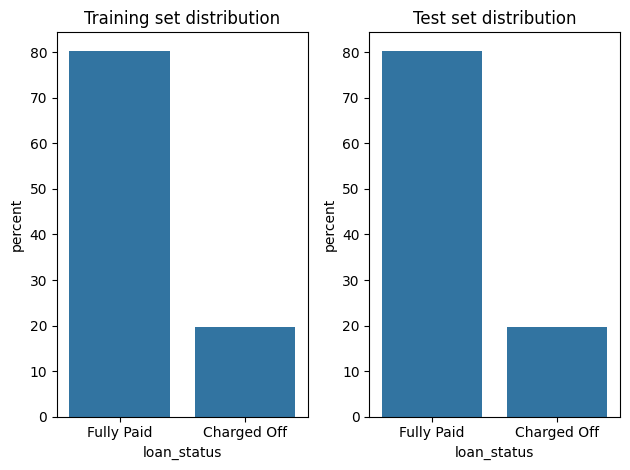

In [18]:
import matplotlib.pyplot as plt

# Checking the label distribution of training & test sets
ax1 = plt.subplot(1,2,1)
sns.countplot(x=y_train["loan_status"], ax=ax1, stat="percent")
ax1.set_title("Training set distribution")

ax2 = plt.subplot(1,2,2)
sns.countplot(x=y_test["loan_status"], ax=ax2, stat="percent")
ax2.set_title("Test set distribution")

plt.tight_layout()
plt.show

In [22]:
# Save the splits
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("../data/train.csv")
test_df.to_csv("../data/test.csv")